# Multiple files with `pandas`

In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
a_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Finland'],
    'Population (M)': [82.8, 67.2, 11.4, 5.5],
    'Capital': ['Berlin', 'Paris', 'Brussels', 'Helsinki']
})
a_df

,Country,Population (M),Capital
0,Germany,82.8,Berlin
1,France,67.2,Paris
2,Belgium,11.4,Brussels
3,Finland,5.5,Helsinki


In [3]:
b_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Canada'],
    'HDI': [0.936, 0.901, 0.916, 0.926]
})
b_df

,Country,HDI
0,Germany,0.936
1,France,0.901
2,Belgium,0.916
3,Canada,0.926


In [14]:
inner_merged_df = a_df.merge(b_df, on='Country')
inner_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916


In [15]:
left_merged_df = a_df.merge(b_df, on='Country', how='left')
left_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN


In [16]:
right_merged_df = a_df.merge(b_df, on='Country', how='right')
right_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Canada,NaN,NaN,0.926


In [17]:
outer_merged_df = a_df.merge(b_df, on='Country', how='outer')
outer_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN
4,Canada,NaN,NaN,0.926


In [18]:
outer_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5 non-null      object 
 1   Population (M)  4 non-null      float64
 2   Capital         4 non-null      object 
 3   HDI             4 non-null      float64
dtypes: float64(2), object(2)
memory usage: 200.0+ bytes


In [19]:
aa_df = a_df.set_index("Country")
aa_df

,Population (M),Capital
Country,,
Germany,82.8,Berlin
France,67.2,Paris
Belgium,11.4,Brussels
Finland,5.5,Helsinki


In [20]:
bb_df = b_df.set_index("Country")
bb_df

,HDI
Country,
Germany,0.936
France,0.901
Belgium,0.916
Canada,0.926


In [21]:
aa_df.join(bb_df)

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916
Finland,5.5,Helsinki,NaN


In [25]:
aa_df.join(bb_df, how='inner')

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916


In [26]:
aa_df.join(bb_df, how='right')

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916
Canada,NaN,NaN,0.926


In [27]:
aa_df.join(bb_df, how='outer')

,Population (M),Capital,HDI
Country,,,
Belgium,11.4,Brussels,0.916
Canada,NaN,NaN,0.926
Finland,5.5,Helsinki,NaN
France,67.2,Paris,0.901
Germany,82.8,Berlin,0.936


In [28]:
concat_df = pd.concat([a_df, b_df], axis="index", sort=False)
concat_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,NaN
1,France,67.2,Paris,NaN
2,Belgium,11.4,Brussels,NaN
3,Finland,5.5,Helsinki,NaN
0,Germany,NaN,NaN,0.936
1,France,NaN,NaN,0.901
2,Belgium,NaN,NaN,0.916
3,Canada,NaN,NaN,0.926


In [29]:
countries_df = pd.read_csv('dictionary.csv')
countries_df.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [34]:
summer_df = pd.read_csv('summer.csv')
summer_df.rename(columns={"Country": "Code"}, inplace=True)
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [35]:
winter_df = pd.read_csv('winter.csv')
winter_df.rename(columns={"Country": "Code"}, inplace=True)
winter_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [36]:
summer_countries_df = summer_df.merge(countries_df, on="Code")
summer_countries_df["Season"] = "Summer"
summer_countries_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346,Summer
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346,Summer
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.54346,Summer
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.54346,Summer
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.54346,Summer


In [37]:
winter_countries_df = winter_df.merge(countries_df, on="Code")
winter_countries_df["Season"] = "Winter"
winter_countries_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
4,1924,Chamonix,Curling,Curling,"ALDEERT, H.",FRA,Men,Curling,Bronze,France,66808385.0,36205.568102,Winter


In [38]:
all_df = pd.concat([summer_countries_df, winter_countries_df], sort=False)
all_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346,Summer
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346,Summer
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.54346,Summer
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.54346,Summer
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.54346,Summer


In [39]:
all_count_df = all_df[all_df["Year"] >= 1984] \
    .groupby(["Country"]) \
    .count()[["Medal"]] \
    .sort_values(by="Medal", ascending=False)
top_10_df = all_count_df.head(10)

<AxesSubplot:xlabel='Country'>

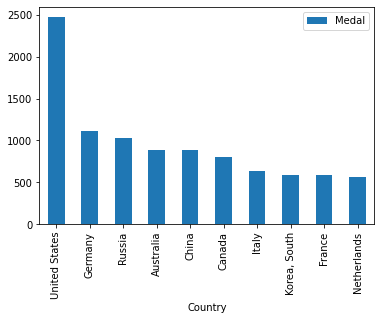

In [40]:
top_10_df.plot(kind="bar")

### Check your code

In [41]:
from nbresult import ChallengeResult

result = ChallengeResult('olympic_games',
    summer_countries_shape=summer_countries_df.shape,
    all_countries_shape=all_df.shape,
    top_country_1=top_10_df.iloc[0]['Medal'],
    top_country_10=top_10_df.iloc[9]['Medal'],
)
result.write()

In [42]:
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/useradd/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/useradd/code/LucaVanTichelen/data-challenges/02-Data-Toolkit/01-Data-Analysis/03-Multiple-Files-With-Pandas
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 3 items

tests/test_olympic_games.py::TestOlympicGames::test_all_countries_df_shape PASSED [ 33%]
tests/test_olympic_games.py::TestOlympicGames::test_summer_countries_df_shape PASSED [ 66%]
tests/test_olympic_games.py::TestOlympicGames::test_top_10_countries_medals PASSED [100%]

============================== 3 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/olympic_games.pickle

git commit -m 'Completed olympic_games step'

git push origin master


In [43]:
season_count_df = all_df[all_df["Year"] >= 1984].groupby(["Country", "Season"])["Medal"].count().unstack()
season_count_df.fillna(0, inplace=True)
season_count_df["Summer"] = season_count_df["Summer"].astype(int)
season_count_df["Winter"] = season_count_df["Winter"].astype(int)
season_count_df.head(10)

Season,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,173,0
Armenia,11,0
Australia,876,15
Austria,28,177
Azerbaijan,26,0
Bahamas,23,0
Bahrain,1,0


In [44]:
season_count_df["Total"] = all_count_df
season_count_df.head(10)

Season,Summer,Winter,Total
Country,,,
Afghanistan,2,0,2
Algeria,15,0,15
Argentina,173,0,173
Armenia,11,0,11
Australia,876,15,891
Austria,28,177,205
Azerbaijan,26,0,26
Bahamas,23,0,23
Bahrain,1,0,1


<AxesSubplot:xlabel='Country'>

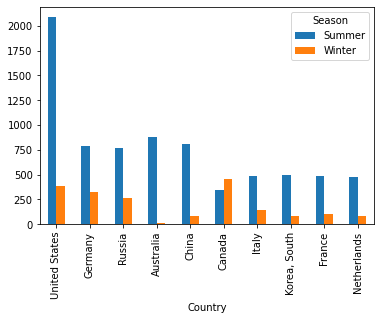

In [45]:
season_count_df.sort_values(by="Total", ascending=False)[["Summer", "Winter"]].head(10).plot(kind="bar")